# *Арешин Станислав Олегович М8О-404Б-17*

# **Лабораторная работа №5 по курсу Численные методы**

*Москва, 2020*

# Постановка задачи

**Вариант 1**

*Уравнение:*

$$\frac{\partial u}{\partial t} = a\frac{\partial^2 u}{\partial x^2}, a > 0$$

$$u(0, t) = 0$$

$$u(1, t) = 0$$

$$u(x, 0) = sin(2\pi x)$$

*Аналитическое решение:*

$$U(x,t) = e^{-4\pi^2at}sin(2\pi x)$$

Используя явную и неявную конечно-разностные схемы, а также схему Кранка - Николсона, решить начально-краевую задачу для дифференциального уравнения параболического типа. Осуществить реализацию трех вариантов аппроксимации граничных условий, содержащих производные: двухточечная аппроксимация с первым порядком, трехточечная аппроксимация со вторым порядком, двухточечная аппроксимация со вторым порядком. В различные моменты времени вычислить погрешность численного решения путем сравнения результатов с приведенным в задании аналитическим решением $U(x,t)$  . Исследовать зависимость погрешности от сеточных параметров $\tau, h$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a = 1

def U(x, t):
    return np.exp(-4 * np.pi ** 2 * a * t) * np.sin(2* np.pi * x)

def u0_k(t, k):
    return 0

def uN_k(t, k):
    return 0

def ui_0(x, i):
    return np.sin(2 * np.pi * x[i])

# Явная конечно-разностная схема

*Явная конечно-разностная схема для решения уравнения параболического типа:*

$$\frac{u_i^{k+1} - u_i^k}{\tau} = a^2\frac{u_{i+1}^k -2u_i^k + u_{i-1}^k}{h^2} + O(\tau + h^2)$$

Сеточную функцию можно выразить $u_i^{k+1}$:

$$u_i^{k+1} = \sigma u_{i+1}^k + (1 - 2\sigma)u_i^k + \sigma u_{i-1}^k$$

Схема является условно устойчивой с условием, накладываемым на сеточные характеристики $\tau, h$:

$$\sigma = \frac{a^2\tau}{h^2} \leq \frac{1}{2}$$

## Реализация

In [3]:
def explicit_FDscheme(T, N, K, l=1, u0_k=u0_k, uN_k=uN_k, ui_0=ui_0):
    # инициализируем пустой список слоев
    u = []
    
    # вычисление шагов сетки по времени и по пространсву
    tau = T / K 
    h = l / N
    
    # вычисляем сигму
    sigma = a * tau / h ** 2
    
    # проверяем условие устойчивости схемы
    if (sigma > 0.5):
        print ('sigma = ', sigma)
        print ('Схема неустойчива, необходимо задать другие параметры сетки')
        return -1,-1,-1
    
    # рассчёт сетки
    x = [i * h for i in range(N + 1)]
    t = [k * tau for k in range(K + 1)]
    
    # первый слой
    u.append([ui_0(x, i) for i in range(len(x))])
    
    for k in range(K + 1):
        # инициализируем следующий слой нулями
        u.append([0 for i in range(len(x))]) 
        
        # рассчёт сеточной функции 
        for i in range(N - 1, 0, -1):
            u[k + 1][i] = sigma * u[k][i + 1] + (1 - 2 * sigma) * u[k][i] + sigma * u[k][i - 1] 
            
        u[k][0] = u0_k(t, k) # начальное условие 
        u[k][N] = uN_k(t, k) # краевое условие 
    
    return x, t, u

## Тест

In [4]:
# пример выполнения
x, t, u = explicit_FDscheme(3, 10, 800)

# решение конечно-разностой схемой
print(f'Решение конечно-разностой схемой: {u[1][9]}')

# аналитическое решение
print(f'Аналитическое решение: {U(x[9], t[1])}')

# абсолютная погреншность
print(f'Абсолютная погреншность: {abs(U(x[9], t[1]) - u[1][9])}')

Решение конечно-разностой схемой: -0.5035925066838011
Аналитическое решение: -0.5069019528391906
Абсолютная погреншность: 0.0033094461553895282


In [5]:
# пример выполнения
x, t, u = explicit_FDscheme(3, 10, 800)

# решение конечно-разностой схемой
print(f'Решение конечно-разностой схемой: {u[0][9]}')

# аналитическое решение
print(f'Аналитическое решение: {U(x[9], t[0])}')

# абсолютная погреншность
print(f'Абсолютная погреншность: {abs(U(x[9], t[0]) - u[0][9])}')

Решение конечно-разностой схемой: -0.5877852522924734
Аналитическое решение: -0.5877852522924734
Абсолютная погреншность: 0.0


## Графики решения

In [6]:
# функция отрисовки графиков решения
def plot_solution(x, t, u, scheme_type):
    
    if scheme_type == 0:
        scheme = 'явной конечно-разностной схемой'
    elif scheme_type == 1:
        scheme = 'неявной конечно-разностной схемой'
    elif scheme_type == 2:
        scheme = 'неявно-явной схемой Кранка-Николсона'

    x_arr = np.arange(0,1,0.01)
    plt.figure(figsize=(14,7))

    # решение явной конечно-разностной схемой
    plt.plot(x,u, color = 'black',  label= f'Решение {scheme} ')

    # аналитическое решение
    plt.plot(x_arr, [U(x_, t) for x_ in x_arr], color ='green',  label='Аналитическое решение')

    # точки сетки при аналитическом решениии
    plt.scatter(x, [U(x_, t) for x_ in x], color = 'red',  label='Точки пространсва (аналитическое решение)')

    # отрисовка координатной сетки
    plt.grid(color = 'blue', linestyle = '--')
    plt.xticks(np.arange(0, 1, 0.1))

    # легенда
    plt.xlabel('l')
    plt.ylabel('U(x,t)')
    plt.title('График решения')
    plt.legend()
    plt.show()

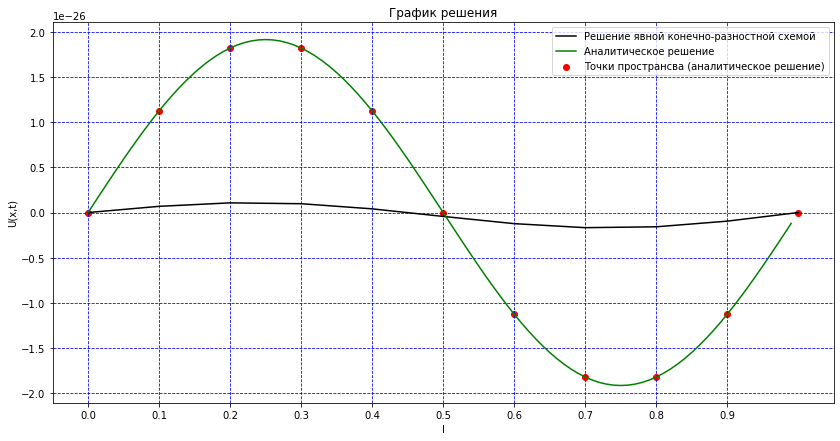

In [7]:
%matplotlib inline
plot_solution(x, t[400], u[400], scheme_type=0)

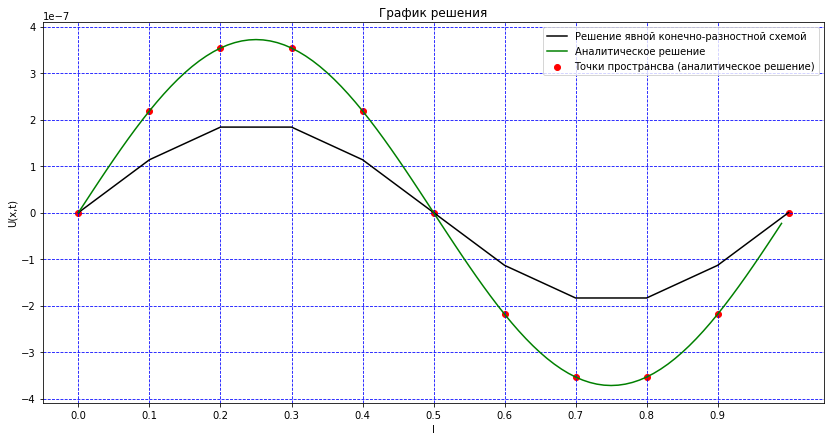

In [8]:
plot_solution(x, t[100], u[100], scheme_type=0)

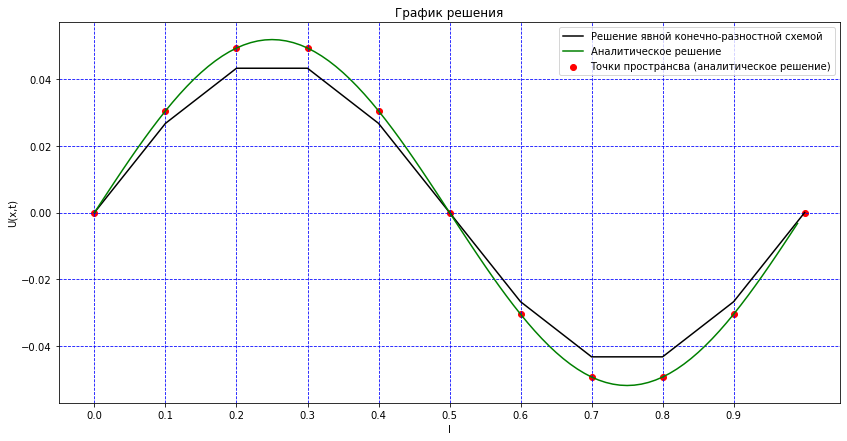

In [9]:
plot_solution(x, t[20], u[20], scheme_type=0)

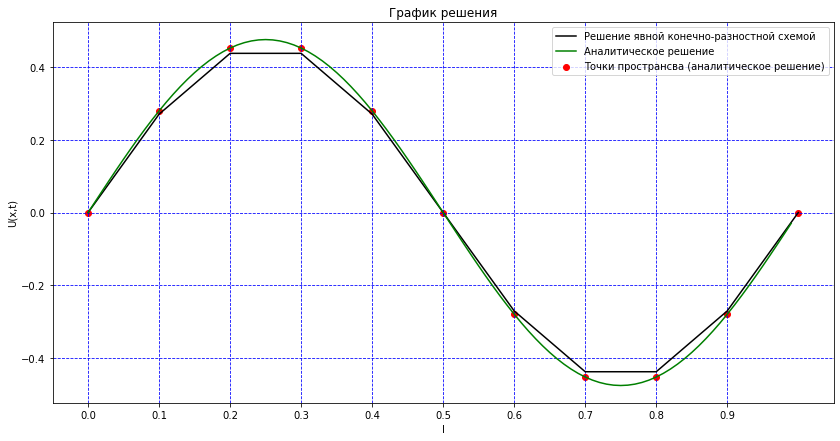

In [10]:
plot_solution(x, t[5], u[5], scheme_type=0)

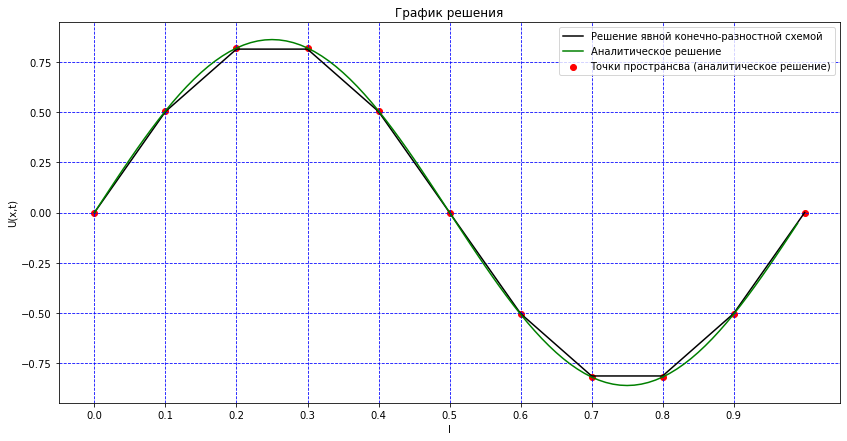

In [11]:
plot_solution(x, t[1], u[1], scheme_type=0)

## Графики погрешности

In [12]:
# аошибки по t
def errors_t(x, t, u):
    # пустой список для ошибок
    errors = []
    # считаем ошибки по t
    for i, t_ in enumerate(t):
        err = 0
        for j, x_ in enumerate(x):
            err += (U(x_, t_) - u[i][j]) ** 2
        errors.append(err ** 0.5)
    return errors

# ошибки по x
def errors_x(x, t, u):
    # пустой список для ошибок
    errors = []
    # считаем ошибки по x
    for i, x_ in enumerate(x):
        err = 0
        for j, t_ in enumerate(t):
            err += (U(x_, t_) - u[j][i]) ** 2
        errors.append(err ** 0.5)
    return errors

# функция отрисовки графиков ошибки по x
def plot_errors_x(x, t, u, scheme_type):
    
    if scheme_type == 0:
        scheme = 'явной конечно-разностной схемы'
    elif scheme_type == 1:
        scheme = 'неявной конечно-разностной схемы'
    elif scheme_type == 2:
        scheme = 'неявно-явной схемы Кранка-Николсона'
    
    plt.figure(figsize=(14,7))
    
    # погрешность по x
    plt.plot(x, errors_x(x,t,u), color = 'black')

    # отрисовка координатной сетки
    plt.grid(color = 'blue', linestyle = '--')

    # легенда
    plt.xlabel('l')
    plt.ylabel('eps')
    plt.title(f'Погрешность {scheme} по x')
    plt.show()
    
# функция отрисовки графиков ошибки по t
def plot_errors_t(x, t, u, scheme_type):
    
    if scheme_type == 0:
        scheme = 'явной конечно-разностной схемы'
    elif scheme_type == 1:
        scheme = 'неявной конечно-разностной схемы'
    elif scheme_type == 2:
        scheme = 'неявно-явной схемы Кранка-Николсона'
    
    plt.figure(figsize=(14,7))
    
   # погрешность по t
    plt.plot(t, errors_t(x,t,u), color = 'black')

    # отрисовка координатной сетки
    plt.grid(color = 'blue', linestyle = '--')

    # легенда
    plt.xlabel('t')
    plt.ylabel('eps')
    plt.title(f'Погрешность {scheme} по t')
    plt.show()
    

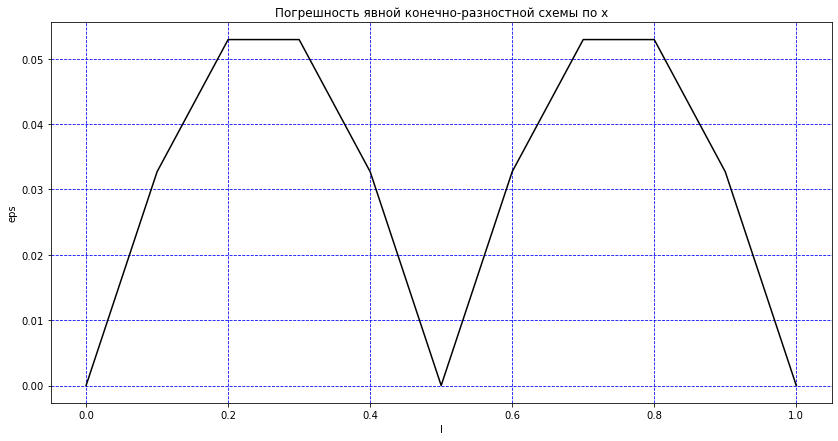

In [13]:
plot_errors_x(x, t, u, 0)

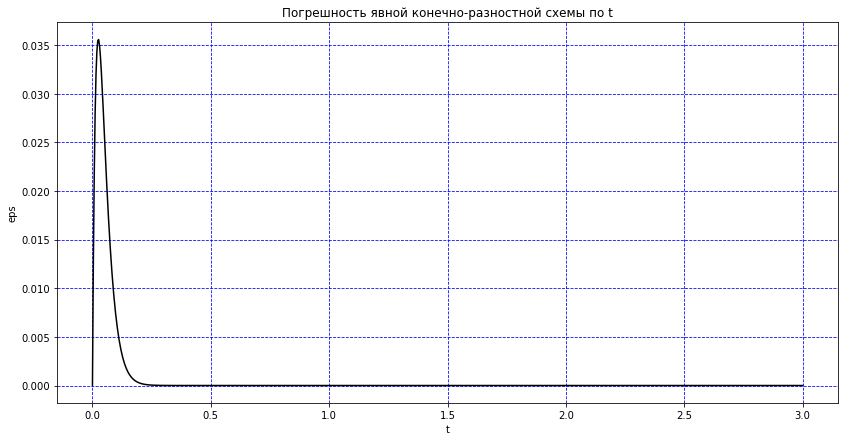

In [14]:
plot_errors_t(x, t, u, 0)

# Неявная конечно-разностная схема

*Неявная конечно-разностная схема для решения уравнения параболического типа:*

$$\frac{u_i^{k+1} - u_i^k}{\tau} = a^2\frac{u_{i+1}^{k+1} -2u_i^{k+1} + u_{i-1}^{k+1}}{h^2} + O(\tau + h^2)$$

Сеточную функцию на верхнем временном слое можно получить из решения СЛАУ  с трехдиагональной матрицей. 

Эта СЛАУ в форме, пригодной для использования метода прогонки, имеет вид:

$$ b_1u_1^{k+1} + c_1u_2^{k+1} = d_1, \text{если   } i = 1$$
$$ a_iu_{i-1}^{k+1} + b_iu_i^{k+1} + c_iu_{i+1}^{k+1} = d_i, \text{если   } i = 2 \ldots N-2$$
$$ a_{N-1}u_{N-2}^{k+1} + b_{N-1}u_{N-1}^{k+1} = d_{N-1}, \text{если   } i = N-1$$

где:

$$a_i = \sigma, b_i = -(1 + 2\sigma), c_i = \sigma$$
$$d_i = -u_i^{k}, \text{если   } i = 2 \ldots N-2$$
$$d_1 = -(u_1^{k} + \sigma \phi_0(t^{k+1}))$$
$$d_{N-1} = -(u_{N-1}^{k} + \sigma \phi_l(t^{k+1}))$$
$$\sigma = \frac{a^2\tau}{h^2} $$

## Реализация

In [15]:
# метод прогонки
def tridig_matrix_alg(A, b):
    
    X = [0 for i in range(len(A[0]))]
    P = [0 for i in range(len(A[0]))]
    Q = [0 for i in range(len(A[0]))]
    P[0] = -A[0][1] / A[0][0]
    Q[0] = b[0] / A[0][0]
    
    for i in range(1, len(b)):
        if i != len(A[0]) - 1:
            P[i] = -A[i][i + 1] / (A[i][i] + P[i - 1] * A[i][i - 1])
        else:
            P[i] = 0
        Q[i] = (b[i] - Q[i - 1] * A[i][i - 1]) / (A[i][i] + P[i - 1] * A[i][i - 1])
    for i in range(len(b) - 1, -1, -1):
        if i != len(A[0]) - 1:
            X[i] = X[i + 1] * P[i] + Q[i]
        else:
            X[i] = Q[i]
    return X

In [16]:
def implicit_FDscheme(T, N, K, l=1, u0_k=u0_k, uN_k=uN_k, ui_0=ui_0):
    
    # инициализируем пустой список слоев
    u = []
    
    # вычисление шагов сетки по времени и по пространсву
    tau = T / K 
    h = l / N
    
    # вычисляем сигму
    sigma = a * tau / h ** 2

    # рассчёт сетки
    x = [i * h for i in range(N + 1)]
    t = [k * tau for k in range(K + 1)]
    
    
    # вычилсяем начальные параметры
    u.append([ui_0(x, i) for i in range(len(x))])
    
    for k in range(K + 1):
        # инициализируем пустые списки для СЛАУ, которое будем решать методом прогонки
        A = []
        b = []
        
        for i in range(1, N):
            
            # инициализируем i-ю строку матрицы A нулями
            Ai_str = [0 for pos in range(N-1)]
            
            # задаём коэфициенты для расчета трехдиагональной матрицы A и стобца b
            bi = - (1 + 2 * sigma)
            ci = ai = sigma
            d1 = - (u[k][1] + sigma * u0_k(t, k + 1))
            dNsub1 = - (u[k][N - 1] + sigma * uN_k(t, k + 1))
            di = - u[k][i]
            
            # заполняем 1-ю строку трехдиагональной матрицы A и стобца b
            if i == 1:
            
                Ai_str[0] = bi
                Ai_str[1] = ci
                A.append(Ai_str)
                
                b.append(d1)
                continue
                
            # заполняем последнюю строку трехдиагональной матрицы A и стобца b    
            elif i == N - 1:
                
                Ai_str[N - 2] = bi
                Ai_str[N - 3] = ai
                A.append(Ai_str)
                
                b.append(dNsub1)
                continue
                
            # заполняем оставшиеся элементы стобца b
            else:
                b.append(di) 
                
            # заполняем оставшиеся строки трехдиагональной матрицы A
            for j in range(1, N):
                if (j == i - 1):
                    Ai_str[j-1] = ai
                elif (j == i + 1):
                    Ai_str[j-1] = ci
                elif j == i:
                    Ai_str[j-1] = bi
                        
            A.append(Ai_str)
            
        # решаем СЛАУ методом прогонки и составляем сетку    
        u.append([u0_k(t, k + 1)] + tridig_matrix_alg(A, b) + [uN_k(t, k + 1)])
    
    return x, t, u

## Тест

In [17]:
x, t, u = implicit_FDscheme(3, 10, 800)

# решение конечно-разностой схемой
print(f'Решение конечно-разностой схемой: {u[1][9]}')

# аналитическое решение
print(f'Аналитическое решение: {U(x[9], t[1])}')

# абсолютная погреншность
print(f'Абсолютная погреншность: {abs(U(x[9], t[1]) - u[1][9])}')

Решение конечно-разностой схемой: -0.5141410937435955
Аналитическое решение: -0.5069019528391906
Абсолютная погреншность: 0.007239140904404917


In [18]:
# пример выполнения
x, t, u = explicit_FDscheme(3, 10, 800)

# решение конечно-разностой схемой
print(f'Решение конечно-разностой схемой: {u[0][9]}')

# аналитическое решение
print(f'Аналитическое решение: {U(x[9], t[0])}')

# абсолютная погреншность
print(f'Абсолютная погреншность: {abs(U(x[9], t[0]) - u[0][9])}')

Решение конечно-разностой схемой: -0.5877852522924734
Аналитическое решение: -0.5877852522924734
Абсолютная погреншность: 0.0


## Графики решения

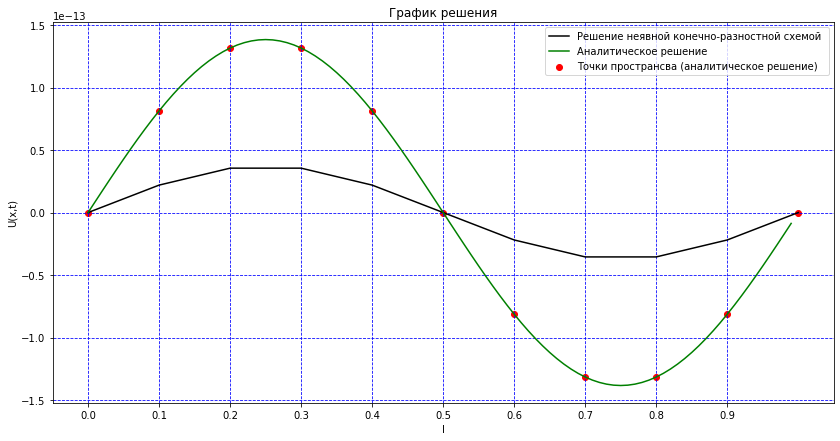

In [19]:
plot_solution(x, t[200], u[200], scheme_type=1)

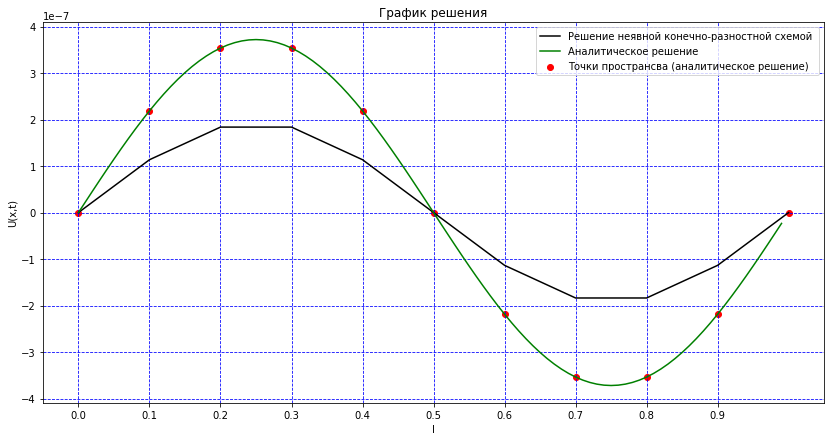

In [20]:
plot_solution(x, t[100], u[100], scheme_type=1)

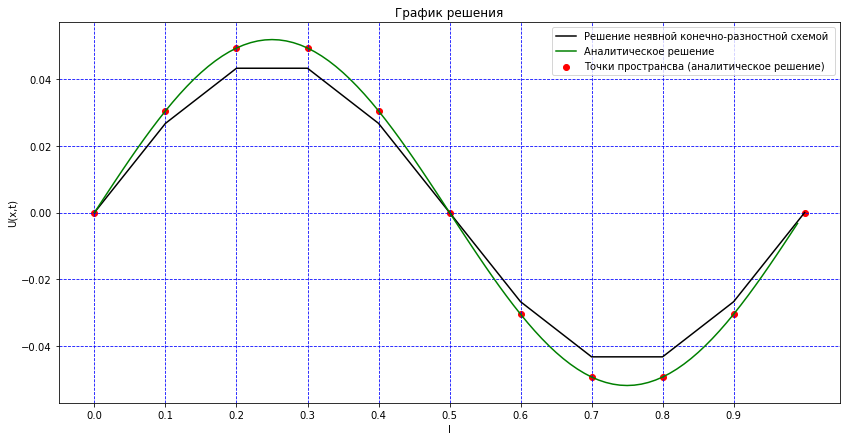

In [21]:
plot_solution(x, t[20], u[20], scheme_type=1)

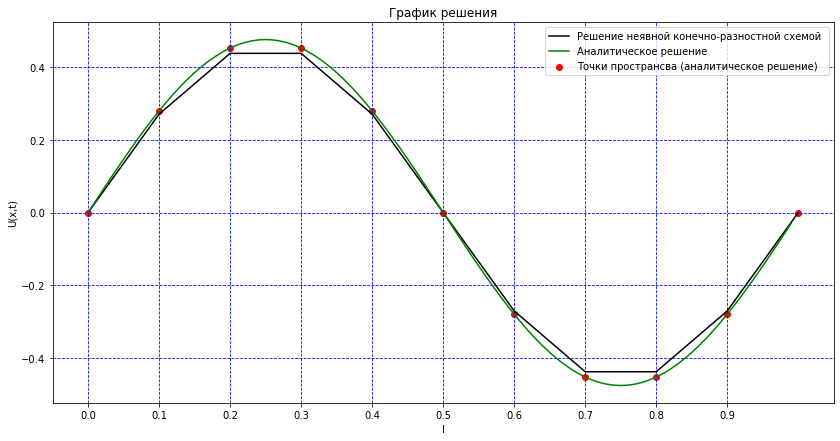

In [22]:
plot_solution(x, t[5], u[5], scheme_type=1)

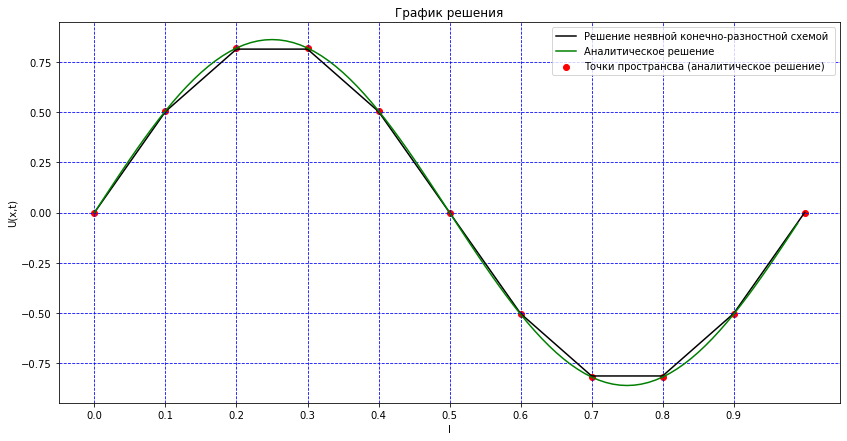

In [23]:
plot_solution(x, t[1], u[1], scheme_type=1)

## Графики погрешности

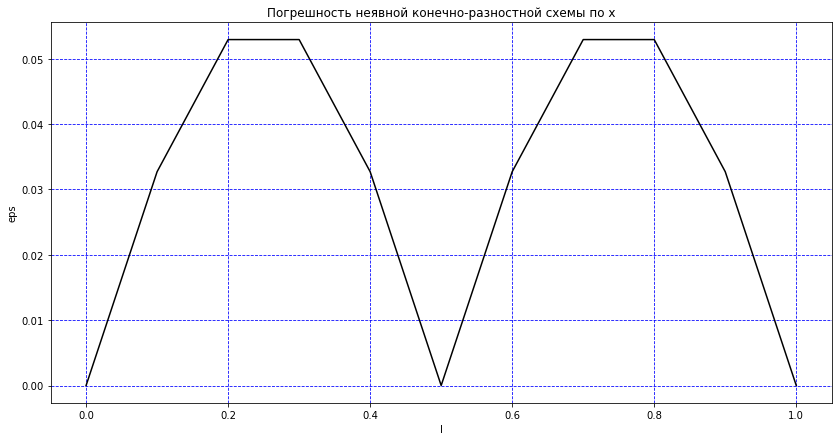

In [24]:
plot_errors_x(x, t, u, 1)

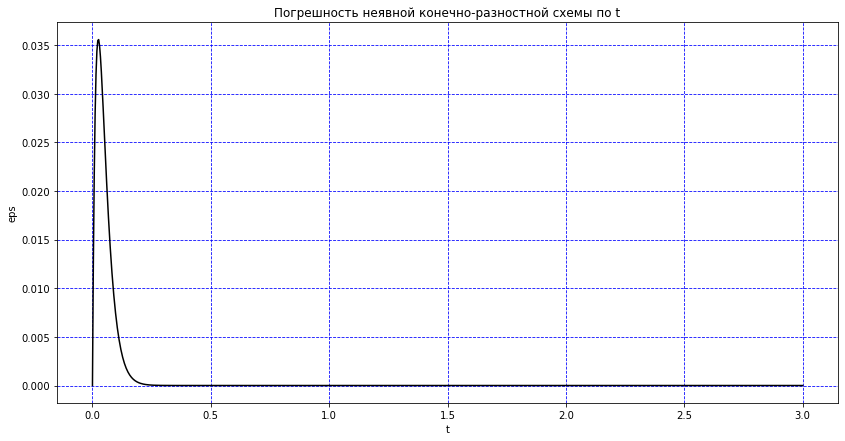

In [25]:
plot_errors_t(x, t, u, 1)

# Cхема Кранка - Николсона

 Неявно-явная схему с весами:

$$\frac{u_i^{k+1} - u_i^k}{\tau} = \theta a\frac{u_{i+1}^{k+1} -2u_i^{k+1} + u_{i-1}^{k+1}}{h^2} + (1 - \theta) a\frac{u_{i+1}^{k} -2u_i^{k} + u_{i-1}^{k}}{h^2}$$

При $\theta = 1$ имеем полностью неявную схему, при $\theta = 0$ - полностью явную схему, и при $\theta = \frac{1}{2}$  - схему Кранка-Николсона.

Для схемы Кранка-Николсона порядок аппроксимации составляет $O(\tau^2 + h^2)$,

Cхема Кранка-Николсона при $\theta = \frac{1}{2}$ абсолютно устойчива и имеет второй порядок аппроксимации по времени и пространственной переменной x.

## Реализация

In [26]:
def implicit_emplicit_FDscheme(T, N, K, theta=0.5, l=1, u0_k=u0_k, uN_k=uN_k, ui_0=ui_0):
    
    # явная схема
    if theta == 0:
        x, t, u = explicit_FDscheme(T, N, K, l, u0_k, uN_k, ui_0)
    
    # неявная схема
    elif theta == 1:
        x, t, u = implicit_FDscheme(T, N, K, l, u0_k, uN_k, ui_0)
        
    # неявно-явная схема Кранка-Николсона   
    else:
        # вычисляем по явной схеме
        x, t, u_explicit = explicit_FDscheme(T, N, K, l,u0_k, uN_k, ui_0)
        # вычисляем по неявной схеме
        u_implicit = implicit_FDscheme(T, N, K, l, u0_k, uN_k, ui_0)[2]
        
        # инициализация матрицы U, заполненной нулями
        u = [[ 0 for j in range(len(x))] for i in range(len(t))]
        
        # вычисляем по неявно-явной схеме Кранка-Николсона
        for i in range(len(u)):
            for j in range(len(u[0])):
                u[i][j] = theta * u_implicit[i][j] + (1 - theta) * u_explicit[i][j]
    
    return x, t, u

## Тест

In [27]:
x, t, u =implicit_emplicit_FDscheme(3, 10, 800)

# решение конечно-разностой схемой
print(f'Решение конечно-разностой схемой: {u[1][9]}')

# аналитическое решение
print(f'Аналитическое решение: {U(x[9], t[1])}')

# абсолютная погреншность
print(f'Абсолютная погреншность: {abs(U(x[9], t[1]) - u[1][9])}')

Решение конечно-разностой схемой: -0.5088668002136982
Аналитическое решение: -0.5069019528391906
Абсолютная погреншность: 0.001964847374507639


In [28]:
# пример выполнения
x, t, u = explicit_FDscheme(3, 10, 800)

# решение конечно-разностой схемой
print(f'Решение конечно-разностой схемой: {u[0][9]}')

# аналитическое решение
print(f'Аналитическое решение: {U(x[9], t[0])}')

# абсолютная погреншность
print(f'Абсолютная погреншность: {abs(U(x[9], t[0]) - u[0][9])}')

Решение конечно-разностой схемой: -0.5877852522924734
Аналитическое решение: -0.5877852522924734
Абсолютная погреншность: 0.0


## Графики решения

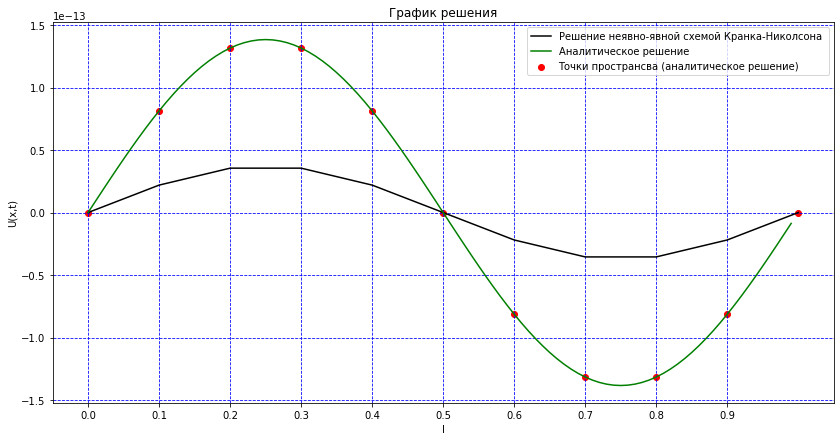

In [29]:
plot_solution(x, t[200], u[200], scheme_type=2)

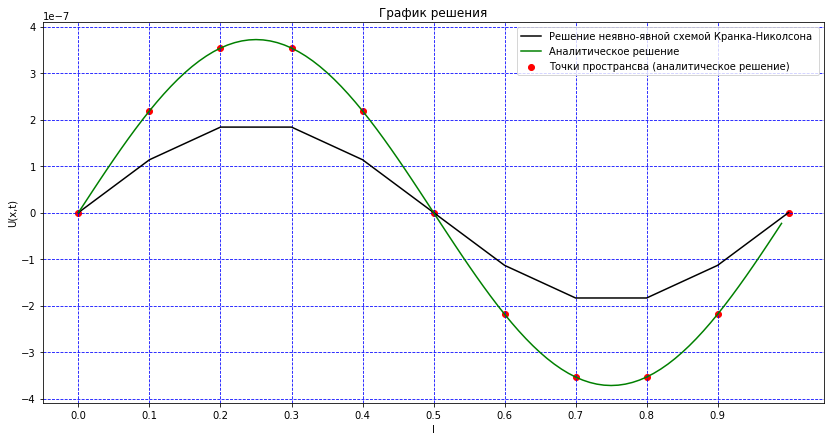

In [30]:
plot_solution(x, t[100], u[100], scheme_type=2)

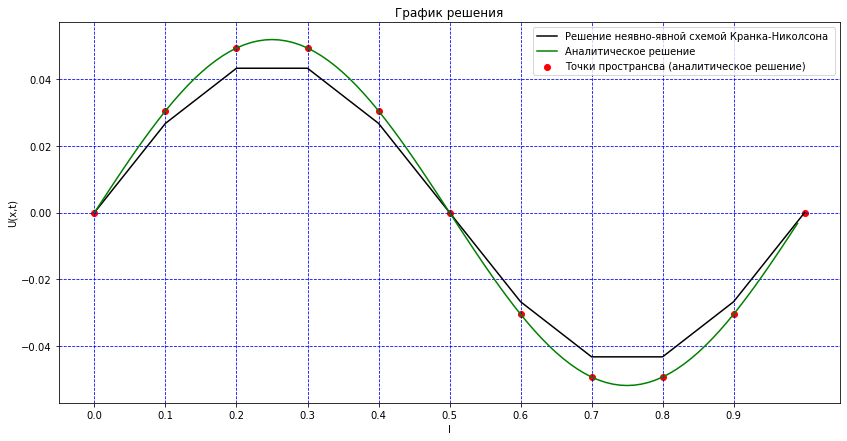

In [31]:
plot_solution(x, t[20], u[20], scheme_type=2)

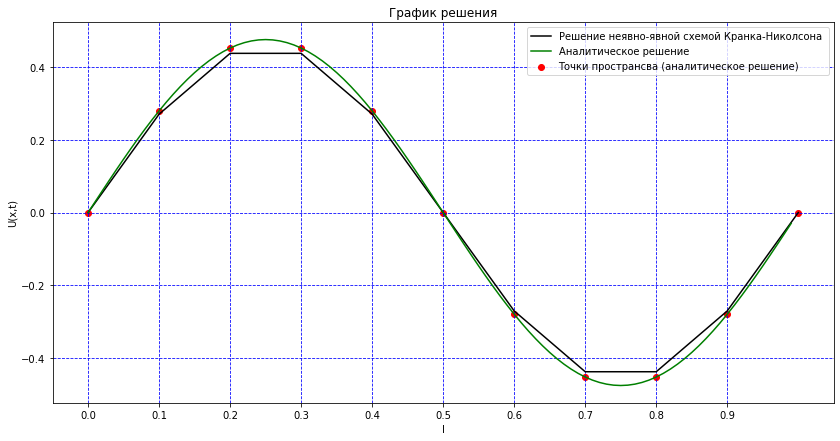

In [32]:
plot_solution(x, t[5], u[5], scheme_type=2)

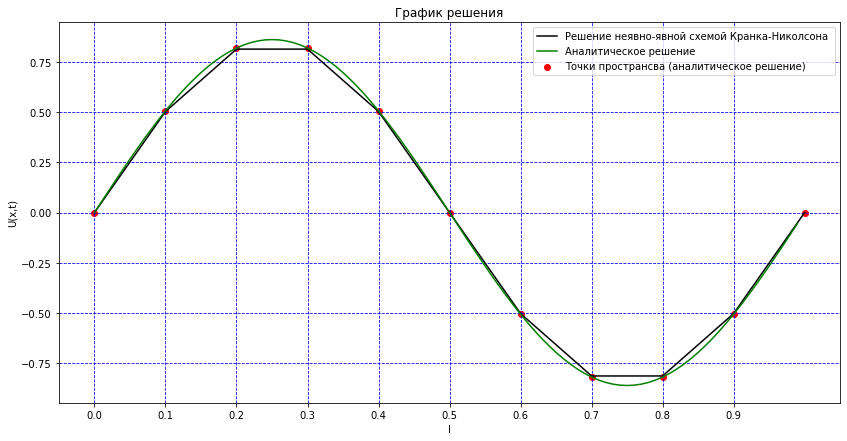

In [33]:
plot_solution(x, t[1], u[1], scheme_type=2)

## Графики погрешности

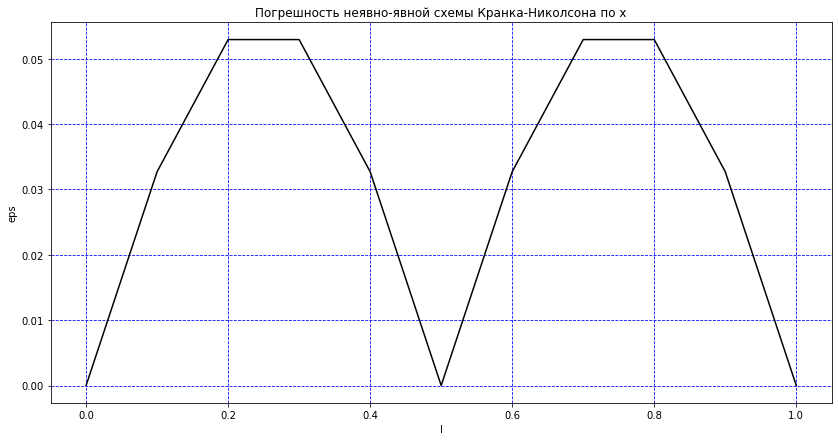

In [34]:
plot_errors_x(x, t, u, 2)

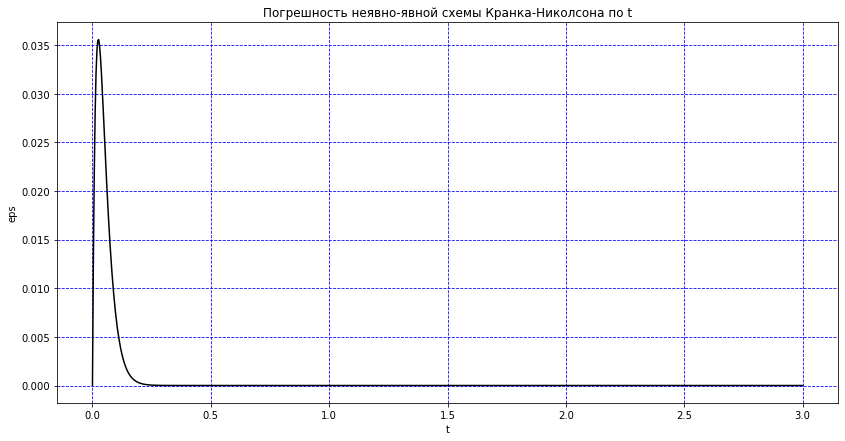

In [35]:
plot_errors_t(x, t, u, 2)

# Вывод

В результате выполнения лабораторной работы были освоены 3 конечно-разностые схемы для решения начально-краевой задачи для дифференциального уравнения параболического типа : явная конечно-разностная схема, неявная конечно-разностная схема и схема Cхема Кранка - Николсона.

Для моего варианта погрешности решения по  $\tau, h$ для всех трёх схем практически совпадают, однако приоритетнее использовать либо неявную схему, либо схему Кранка-Николсона с параметром  $\theta = \frac{1}{2}$, так как они абсолютно устойчивы.